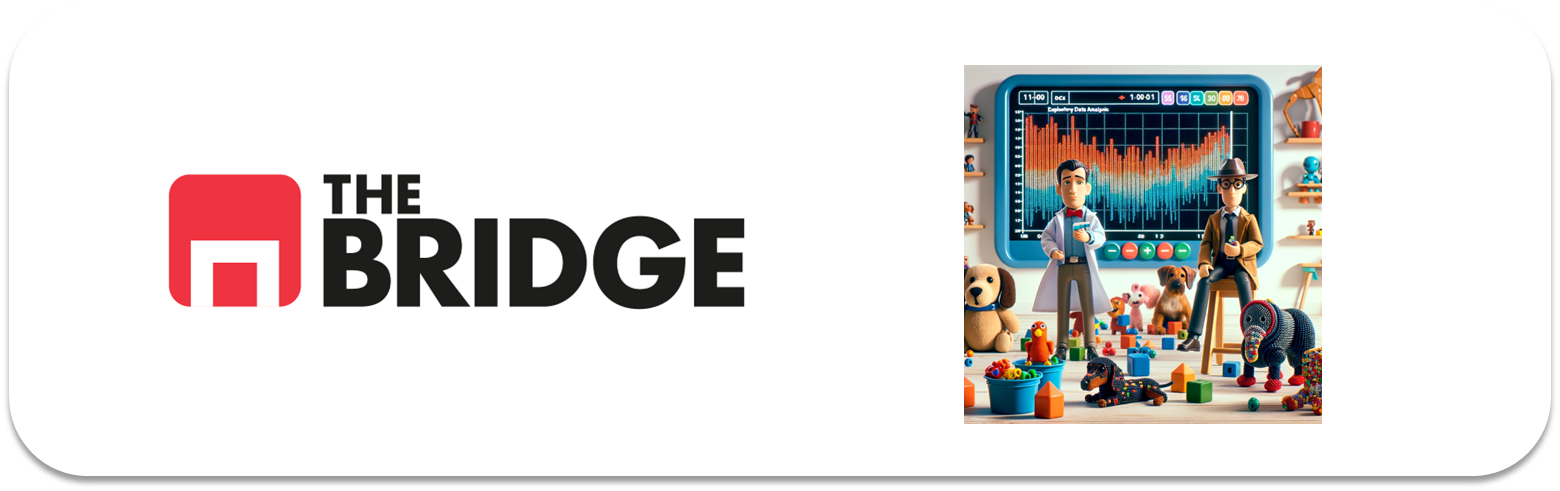

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import bootcampviztools as vit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic2 = df_titanic.drop(columns = ["deck","survived","pclass","embarked"], axis = 1)
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic2["family_members"] = df_titanic2["sibsp"] + df_titanic2["parch"]
df_titanic2.drop(columns = ["sibsp","parch"], axis = 1, inplace = True)
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
df_titanic2.loc[df_titanic2["embark_town"].isna(), "embark_town"] = df_titanic2["embark_town"].mode().values[0]
df_titanic2["embark_town"].value_counts(dropna = False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [19]:
df_titanic3 = df_titanic2.copy()
media_edad_woman = round(df_titanic3.loc[df_titanic2["who"] == "woman", "age"].mean(), 2)
media_edad_man = round(df_titanic3.loc[df_titanic2["who"] == "man", "age"].mean(), 2)
media_edad_child = round(df_titanic3.loc[df_titanic2["who"] == "child", "age"].mean(), 2)
print(media_edad_woman, media_edad_man, media_edad_child)      

df_titanic3.loc[(df_titanic3["who"] == "woman") & (df_titanic3["age"].isnull()), "age"] = media_edad_woman
df_titanic3.loc[(df_titanic3["who"] == "man") & (df_titanic3["age"].isnull()), "age"] = media_edad_man
df_titanic3.loc[(df_titanic3["who"] == "child") & (df_titanic3["age"].isnull()), "age"] = media_edad_child  

df_titanic3["age"].value_counts()

32.0 33.17 6.37


age
33.17    124
32.00     71
24.00     30
22.00     27
18.00     26
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

<font color="blue">En términos absolutos sobrevivieron más mujeres (205), frente a hombres (88) o niños (49).   
En términos relativos sobrevivieron más mujeres (76%), frente a niños (59%) y hombres (16%).   
Hay una variación altísima entre los supervivientes hombres y mujeres, tanto en términos absolutos como relativos.   
Si se tratan los datos como niños o adultos, sigue habiendo diferencia entre los porcentajes de supervivencia (menor en los adultos por la enorme mortalidad entre los hombres).</font>



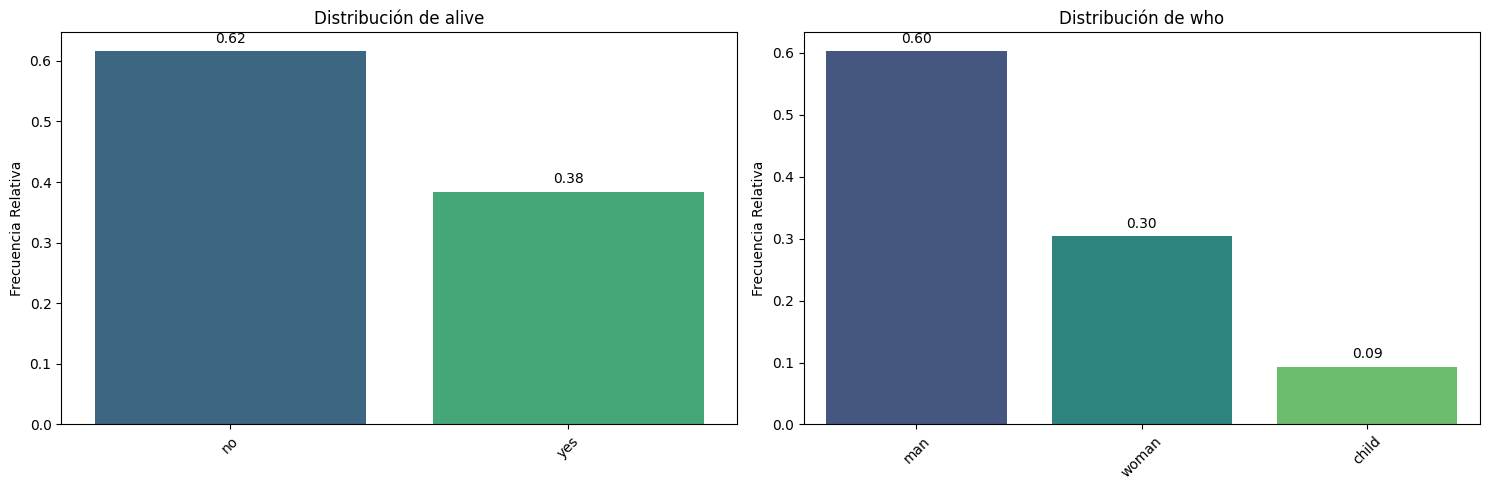

In [8]:
vit.pinta_distribucion_categoricas(df_titanic3,["alive","who"], relativa= True, mostrar_valores= True)

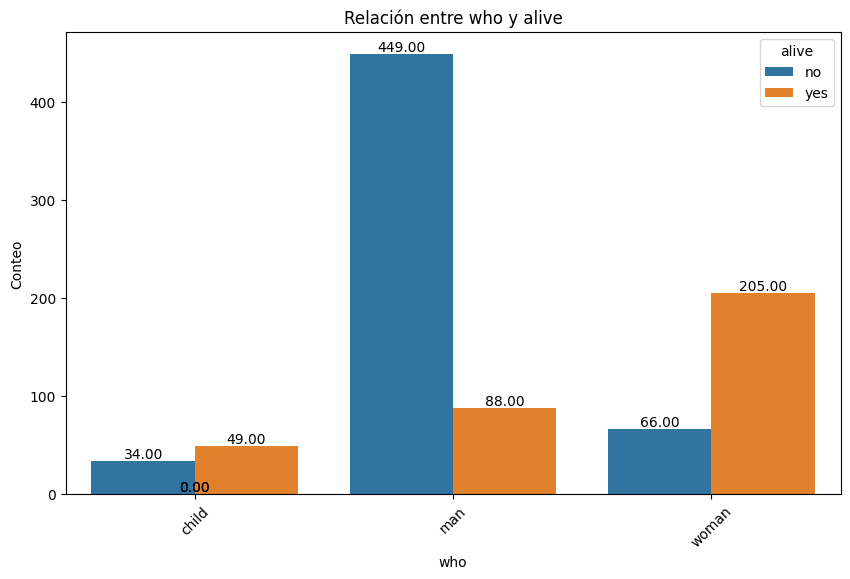

In [11]:
vit.plot_categorical_relationship_fin(df_titanic3, "who","alive", show_values= True)

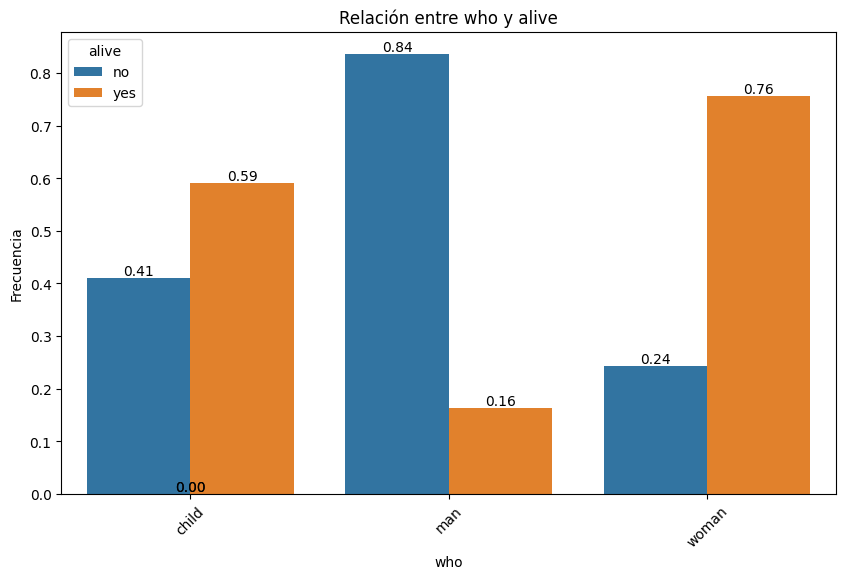

In [10]:
vit.plot_categorical_relationship_fin(df_titanic3, "who","alive", show_values= True, relative_freq = True)

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

<font color="blue">Aunque en términos absolutos no hay una gran diferencia entre el número de supervivientes en función de la clase, en términos relativos queda el incremento en la supervivencia conforme se asciende de clase, con unos valores del 24, 47 y 63 por ciento para tercera, segunda y primera clase respectivamente. </font>


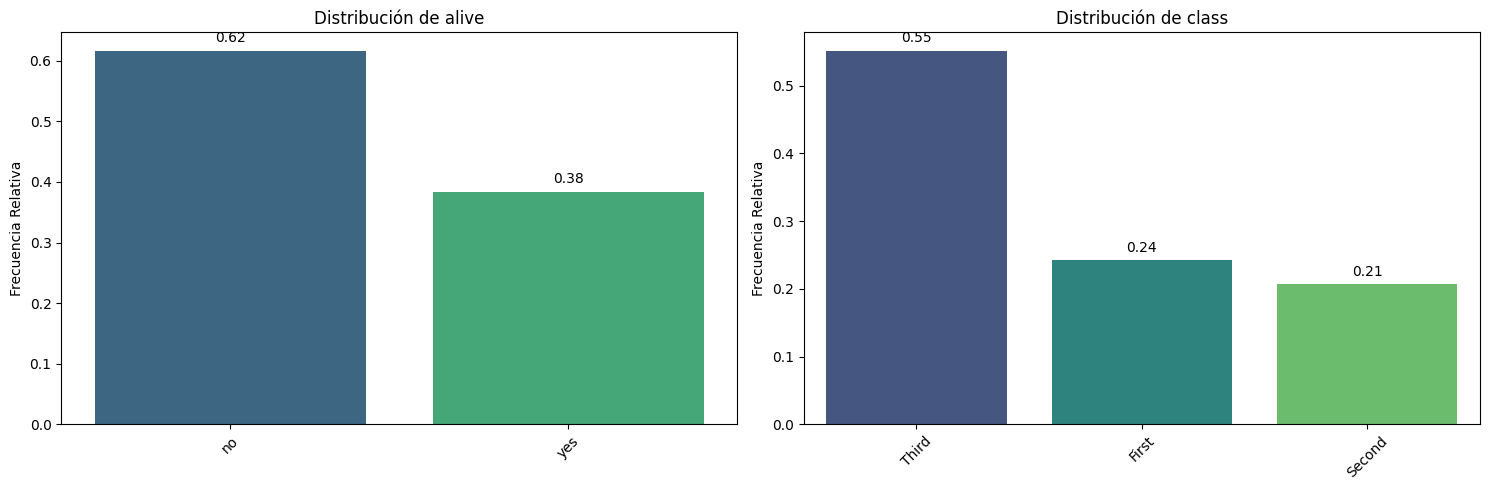

In [32]:
vit.pinta_distribucion_categoricas(df_titanic3,["alive","class"], relativa= True, mostrar_valores= True)

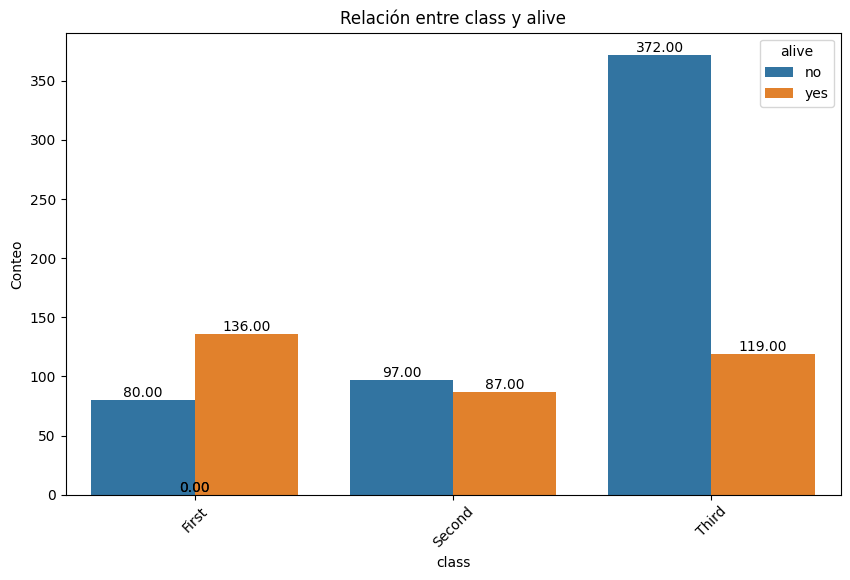

In [33]:
vit.plot_categorical_relationship_fin(df_titanic3, "class","alive", show_values= True)

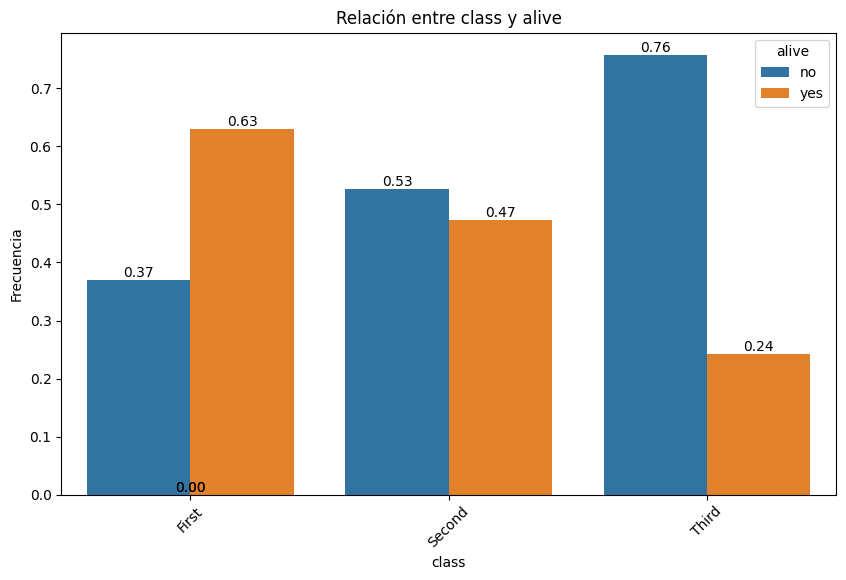

In [34]:
vit.plot_categorical_relationship_fin(df_titanic3, "class","alive", show_values= True, relative_freq = True)

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

<font color="blue">Sobrevivieron más pasajeros que embarcaron en Southampton que pasajeros que embarcaron en las otras ciudads, algo esperable porque la mayor parte del pasaje embarcó en esa ciudad.   
Pero es Cherbourg la ciudad que cuenta con una mejor proporción de pasajeros supervivientes, con el 55 por ciento.
En cualquier caso, no parece haber mucha incidencia en la supervivencia atendiendo al puerto de embarque, sino al hecho de que los pasajeros de Cherbourg eran en su mayoría de primera clase.</font>


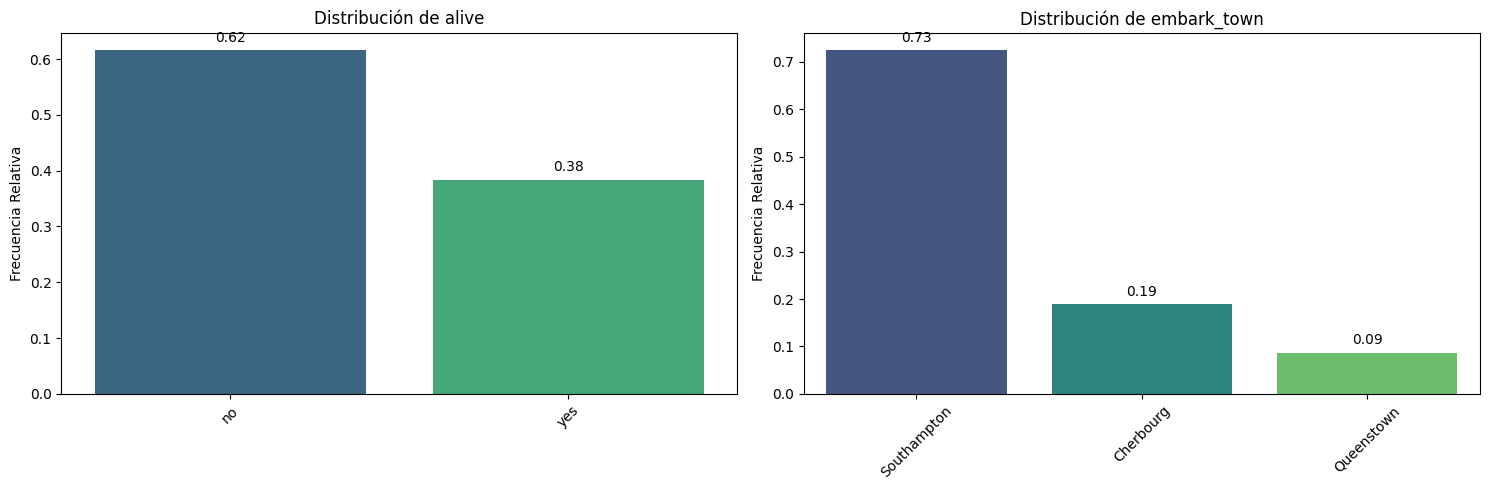

In [35]:
vit.pinta_distribucion_categoricas(df_titanic3,["alive","embark_town"], relativa= True, mostrar_valores= True)

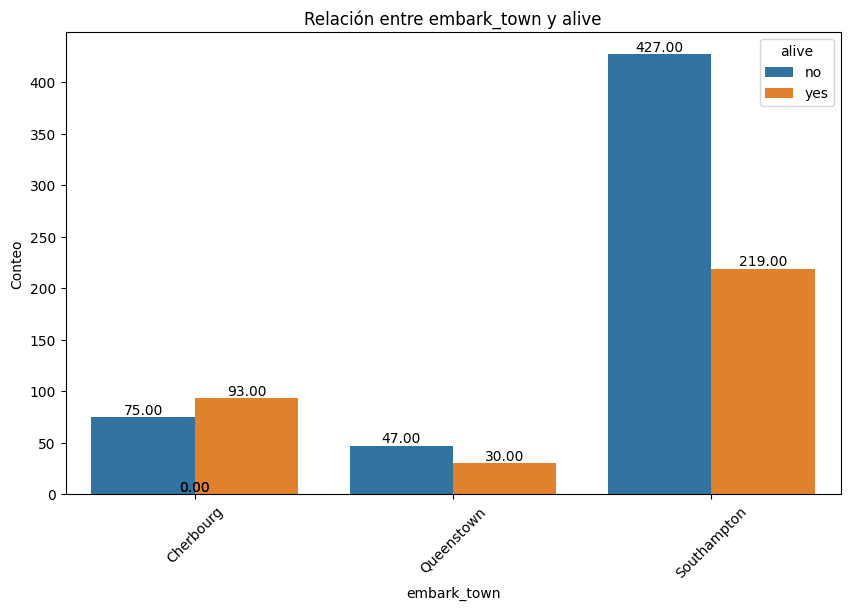

In [36]:
vit.plot_categorical_relationship_fin(df_titanic3, "embark_town","alive", show_values= True)

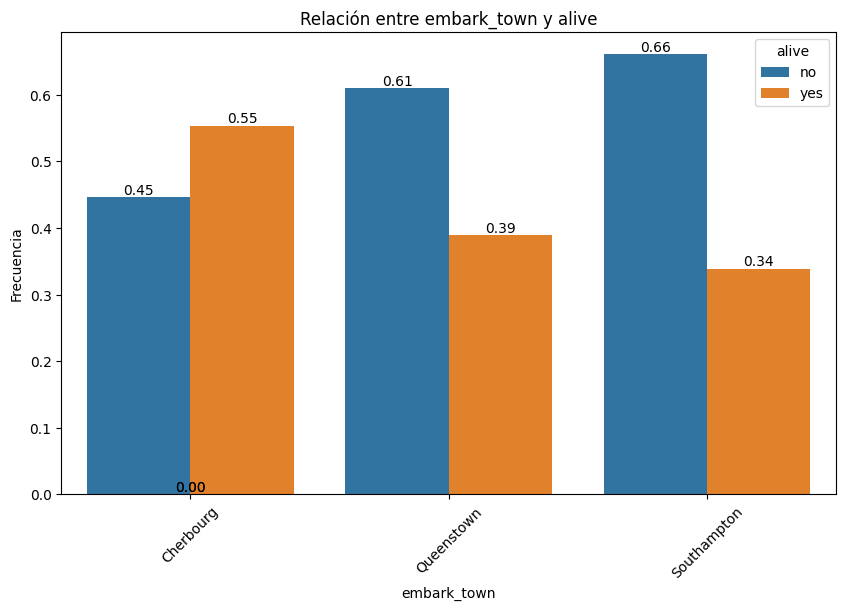

In [37]:
vit.plot_categorical_relationship_fin(df_titanic3, "embark_town","alive", show_values= True, relative_freq = True)

In [54]:
df_titanic4 = df_titanic3.groupby("embark_town")["class"].value_counts(sort = False)
df_titanic4

embark_town  class 
Cherbourg    First      85
             Second     17
             Third      66
Queenstown   First       2
             Second      3
             Third      72
Southampton  First     129
             Second    164
             Third     353
Name: count, dtype: int64

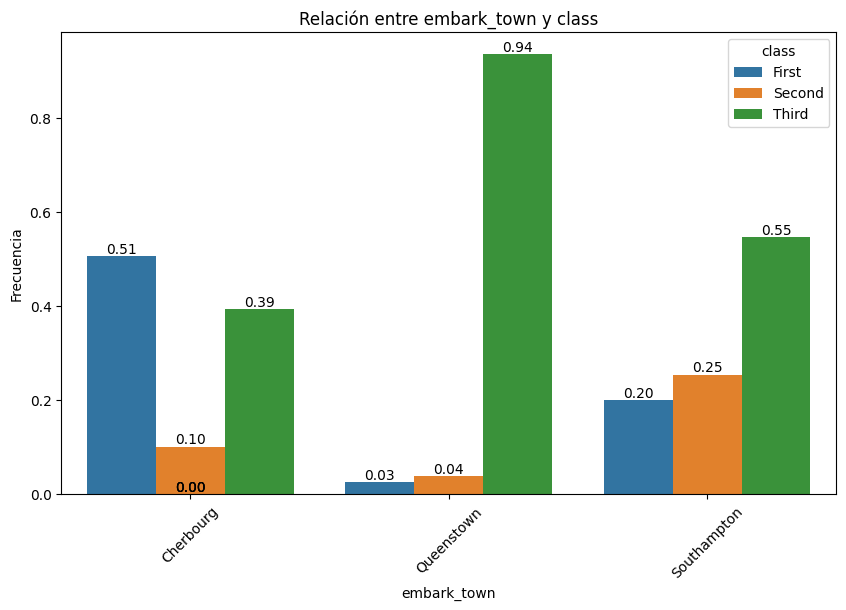

In [55]:
vit.plot_categorical_relationship_fin(df_titanic3, "embark_town","class", show_values= True, relative_freq = True)

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?   
<font color="blue">En pasajes de primera clase (ver describe) la tasa de supervivencia es menor que la de mortalidad, pero se invierte la tendencia para segunda y tercera clase, con pasajes más caros.</font>


In [96]:
df_titanic3.loc[df_titanic["class"] == "Third"]["fare"].describe()

count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: fare, dtype: float64

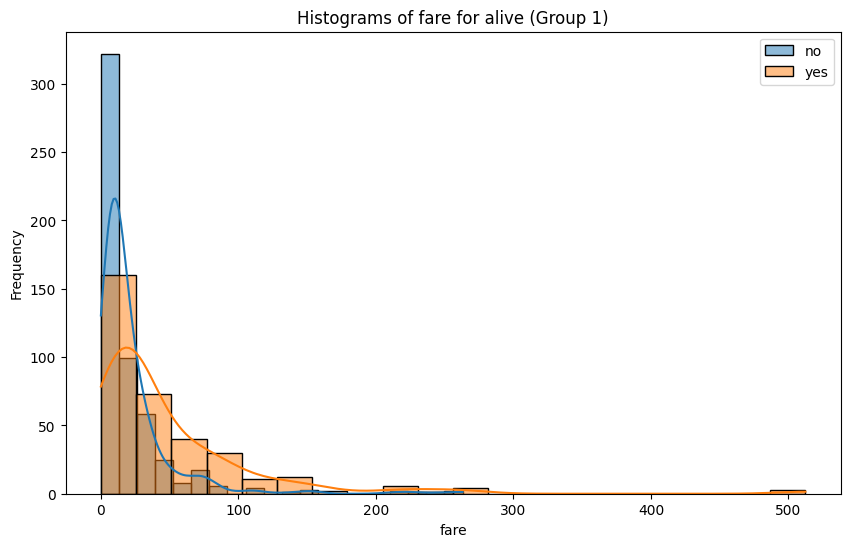

In [95]:
vit.plot_grouped_histograms(df_titanic3,"alive", "fare", 2, bins = 20)

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?   
<font color="blue">Me faltan datos para lanzar una hipótesis, pero podría ser personal del barco y de servicio de los pasajeros?   
Los tres pasajeros con el mayor gasto sobrevivieron.</font>


In [60]:
df_titanic3.loc[df_titanic3["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.00,0.0,Third,man,True,Southampton,no,True,0
263,male,40.00,0.0,First,man,True,Southampton,no,True,0
271,male,25.00,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.17,0.0,Second,man,True,Southampton,no,True,0
302,male,19.00,0.0,Third,man,True,Southampton,no,True,0
413,male,33.17,0.0,Second,man,True,Southampton,no,True,0
466,male,33.17,0.0,Second,man,True,Southampton,no,True,0
481,male,33.17,0.0,Second,man,True,Southampton,no,True,0
597,male,49.00,0.0,Third,man,True,Southampton,no,True,0
633,male,33.17,0.0,First,man,True,Southampton,no,True,0


In [66]:
df_titanic3.loc[df_titanic3["fare"] == df_titanic3["fare"].max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.



In [171]:
#df_titanic3.loc[df_titanic3["fare"] > 100].sort_values(["fare"], ascending = False)
df_titanic3.groupby("embark_town")["alive"].value_counts(sort = False)

embark_town  alive
Cherbourg    no        75
             yes       93
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?



8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

In [173]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun.csv")
df_viajes

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.